<a href="https://colab.research.google.com/github/atikhasan007/Scikit-learn/blob/main/Handling%20imblance%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd

n_class_0 = 900
n_class_1 = 100


In [13]:
n_class_0,n_class_1

(900, 100)

In [14]:
##create my dataframe with imbalanced dataset

class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'target' : [0] * n_class_0

})

In [15]:
class_0

,feature_1,feature_2,target
0,-0.715878,-1.172686,0
1,0.243642,2.408780,0
2,-0.332006,1.574510,0
3,-1.031440,-0.613130,0
4,0.037112,0.624970,0
...,...,...,...
895,0.416203,-0.909293,0
896,0.921973,-0.064396,0
897,0.596574,-1.364667,0
898,1.701852,-0.857161,0


In [16]:
class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2,scale=1, size = n_class_1),
    'feature_2' : np.random.normal(loc=2, scale=1,size= n_class_1),
    'target':[1]*n_class_1
})

In [17]:
class_1

,feature_1,feature_2,target
0,2.658380,2.762618,1
1,0.492190,1.777583,1
2,0.330045,3.071195,1
3,1.453815,2.190532,1
4,2.093276,3.258571,1
...,...,...,...
95,0.402868,3.443765,1
96,2.291555,1.641590,1
97,1.694970,2.839970,1
98,1.509074,1.009873,1


In [18]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)
df.sample(10)

,feature_1,feature_2,target
84,-0.788459,0.308590,0
212,-0.093394,-1.568064,0
586,-1.843102,-0.661744,0
619,0.655351,-0.620512,0
671,-0.759750,0.872203,0
762,-0.501723,0.001422,0
647,-0.835783,0.243643,0
59,-0.921352,-1.979687,0
676,2.071472,0.708197,0
106,0.190092,0.072514,0


In [20]:
df['target'].value_counts()

,count
target,
0,900
1,100


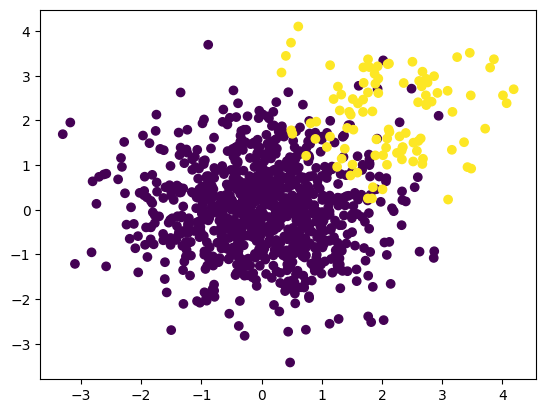

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'],df['feature_2'],c=df['target'])

In [23]:
##upsampling
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]


In [24]:
df_minority

,feature_1,feature_2,target
900,2.658380,2.762618,1
901,0.492190,1.777583,1
902,0.330045,3.071195,1
903,1.453815,2.190532,1
904,2.093276,3.258571,1
...,...,...,...
995,0.402868,3.443765,1
996,2.291555,1.641590,1
997,1.694970,2.839970,1
998,1.509074,1.009873,1


In [26]:
from sklearn.utils import resample
df_minority_upsampled = resample(
    df_minority,
    replace = True,
    n_samples=len(df_majority),
    random_state= 42

)

In [27]:
df_minority_upsampled.shape

(900, 3)

In [28]:
df_minority_upsampled

,feature_1,feature_2,target
951,0.608681,4.101730,1
992,2.679893,1.140487,1
914,3.795346,3.181266,1
971,2.359553,2.836405,1
960,4.186467,2.697084,1
...,...,...,...
952,2.248125,1.271796,1
965,2.755858,2.848570,1
976,3.713048,1.814783,1
942,1.590448,0.830701,1


In [29]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [30]:
df_upsampled.shape

(1800, 3)

In [31]:
df_upsampled['target'].value_counts()

,count
target,
0,900
1,900


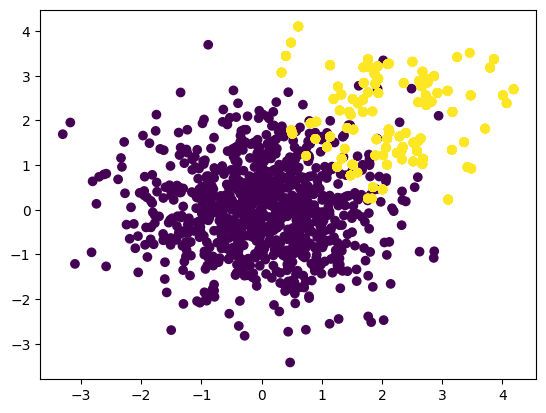

In [33]:
plt.scatter(df_upsampled['feature_1'],df_upsampled['feature_2'],c=df_upsampled['target'])
plt.show()

In [34]:
#down sampling
df

,feature_1,feature_2,target
0,-0.715878,-1.172686,0
1,0.243642,2.408780,0
2,-0.332006,1.574510,0
3,-1.031440,-0.613130,0
4,0.037112,0.624970,0
...,...,...,...
995,0.402868,3.443765,1
996,2.291555,1.641590,1
997,1.694970,2.839970,1
998,1.509074,1.009873,1


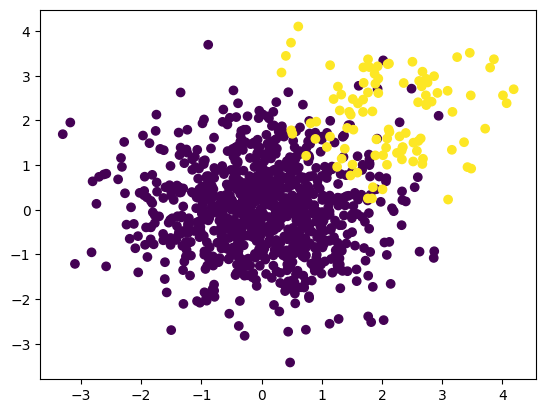

In [35]:
plt.scatter(df['feature_1'],df['feature_2'], c= df['target'])

In [36]:
##downsampling
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]


In [37]:
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42

)

In [39]:
df_majority_downsampled.shape

(100, 3)

In [40]:
df_majority_downsampled = pd.concat([df_minority, df_majority_downsampled])


In [41]:
df_majority_downsampled

,feature_1,feature_2,target
900,2.658380,2.762618,1
901,0.492190,1.777583,1
902,0.330045,3.071195,1
903,1.453815,2.190532,1
904,2.093276,3.258571,1
...,...,...,...
398,1.082355,0.710244,0
76,-0.942091,1.107777,0
196,0.632569,-0.476328,0
631,0.201634,0.426171,0


In [42]:
df_majority_downsampled['target'].value_counts()

,count
target,
1,100
0,100


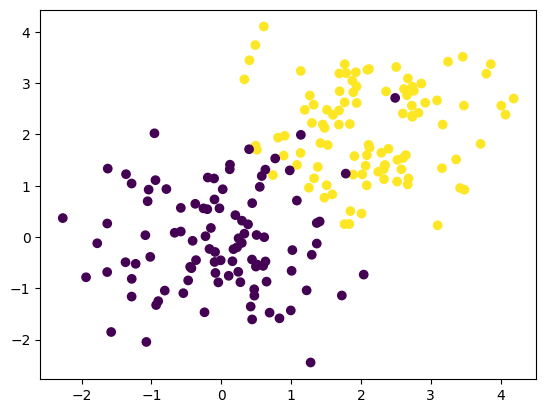

In [43]:
plt.scatter(df_majority_downsampled['feature_1'],df_majority_downsampled['feature_2'],c=df_majority_downsampled['target'])

In [ ]:
SMOTE (Synthetic minority oversampling Technique)

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
oversample = SMOTE()
X,y = oversample.fit_resample(df[['feature_1','feature_2']], df['target'])

In [46]:
X,y

(      feature_1  feature_2
 0     -0.715878  -1.172686
 1      0.243642   2.408780
 2     -0.332006   1.574510
 3     -1.031440  -0.613130
 4      0.037112   0.624970
 ...         ...        ...
 1795   2.118864   1.723519
 1796   2.566478   1.536885
 1797   1.327716   1.193799
 1798   0.866850   1.520082
 1799   2.376970   1.719481
 
 [1800 rows x 2 columns],
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1795    1
 1796    1
 1797    1
 1798    1
 1799    1
 Name: target, Length: 1800, dtype: int64)

In [47]:
len(y[y==0])

900

In [48]:
len(y[y==1])

900

In [49]:
X =pd.DataFrame(X, columns=['feature_1','feature_2'])
y = pd.DataFrame(y, columns=['target'])
oversample_df = pd.concat([X,y], axis = 1)

In [50]:
oversample_df

,feature_1,feature_2,target
0,-0.715878,-1.172686,0
1,0.243642,2.408780,0
2,-0.332006,1.574510,0
3,-1.031440,-0.613130,0
4,0.037112,0.624970,0
...,...,...,...
1795,2.118864,1.723519,1
1796,2.566478,1.536885,1
1797,1.327716,1.193799,1
1798,0.866850,1.520082,1
